# Task #1 Prediction Using Supervised ML

## Author : Vikas Ghunawat Meena

### Problem Statement:

-Predict the Score of a student based on the number of study hours

-What will be the predicted score if a student study 9.25 hours/day

## Importing the Relevant Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split

sns.set() # To make the plot look nicer

## Importing Actual Data 

In [5]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Exploration

In [6]:
# Data Shape
data.shape

(25, 2)

In [7]:
# Detailed view of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plotting the data points

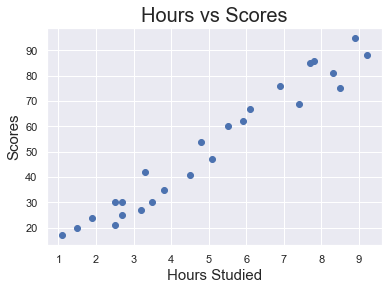

In [30]:
fig = plt.figure()
plt.scatter(data['Hours'],data['Scores'])
plt.title('Hours vs Scores',fontsize=20)
plt.xlabel('Hours Studied', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.show()

## Defining the dependent and the independent variables

In [9]:
x1 = data.iloc[:,:-1].values
y = data.iloc[:,1].values

## Splitting the data into 80:20 for training:testing. 

In [10]:
# Splitting data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.2,random_state = 0)

In [11]:
# Structure of training and testing data
datas = [x_train,y_train,x_test,y_test]
name = ['x_train','y_train','x_test','y_test']
for i in range(len(name)):
    print(f'{name[i]} : {datas[i].shape}')

x_train : (20, 1)
y_train : (20,)
x_test : (5, 1)
y_test : (5,)


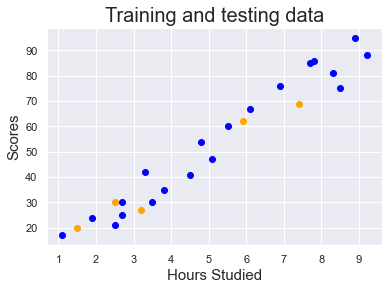

In [31]:
plt.title('Training and testing data',fontsize=20)
plt.scatter(x_train, y_train,color = 'blue')
plt.xlabel('Hours Studied', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.scatter(x_test, y_test, color = 'orange')
plt.show()

#### Above Plot shows training data (blue colour) and testing data (orange colour)

## Modeling and Fitting

In [14]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x_train)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an independent variable x
results = sm.OLS(y_train,x).fit()
# Prints a summary of the regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           2.79e-13
Time:                        13:08:02   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Above is brief summary of the Regression  

## Coefficient of independent variable and constant

In [15]:
print(f'Constant : {results.params[0]}\nx1 : {results.params[1]}')

Constant : 2.0181600414346654
x1 : 9.910656480642242


## Plotting Regression Line 

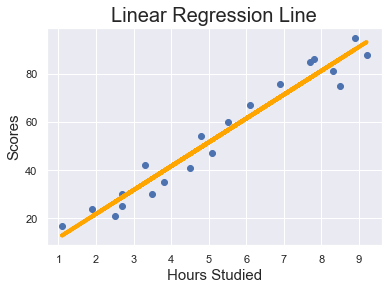

In [35]:
# Create a scatter plot
plt.scatter(x_train,y_train)
# Define the regression equation, so we can plot it later
line = results.params[1]*x_train + results.params[0]
# Plot the regression line against the independent variable (Hour)
fig = plt.plot(x_train,line, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('Hours Studied', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.title('Linear Regression Line',fontsize=20)
plt.show()

## Making Prediction on test data set 

In [17]:
Xnew = sm.add_constant(x_test)
y_pred =  results.predict(Xnew)
pd.DataFrame({'Hours': x_test[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred})

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


## Error in training data set

In [19]:
print(f'Mean Absolute Error in testing data set : {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error in testing data set : {metrics.mean_squared_error(y_test,y_pred)}')

Mean Absolute Error in testing data set : 4.183859899002981
Mean Squared Error in testing data set : 21.59876930721748


## Making prediction for unknown data

In [42]:
h = np.array([9.25,5.9])
hour = sm.add_constant(h)
pd.DataFrame({'Hours': h, 'Predicted Score': results.predict(hour)}).head(1)

,Hours,Predicted Score
0,9.25,93.691732


## If a student studies for 9.25 hours/day he would get 93.69% according to this model.